# Naive Bayes Simple Male or Female

author: Nicholas Farn [<a href="sendto:nicholasfarn@gmail.com">nicholasfarn@gmail.com</a>]

This example shows how to create a simple Gaussian Naive Bayes Classifier using pomegranate. In this example we will be given a set of data measuring a person's height (feet) and try to classify them as male or female. This example is a simplification drawn from the example in the Wikipedia <a href="https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Examples">article</a> on Naive Bayes Classifiers.

In [1]:
from pomegranate import *
import seaborn
seaborn.set_style('whitegrid')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


First we'll create the distributions for our model. In this case we'll assume that height, weight, and foot size are normally distributed. We'll fit our distribution to a set of data for males and females.

In [2]:
male = NormalDistribution.from_samples([ 6.0, 5.92, 5.58, 5.92, 6.08, 5.83 ])
female = NormalDistribution.from_samples([ 5.0, 5.5, 5.42, 5.75, 5.17, 5.0 ])

Let's check on the parameters for our male and female height distributions.

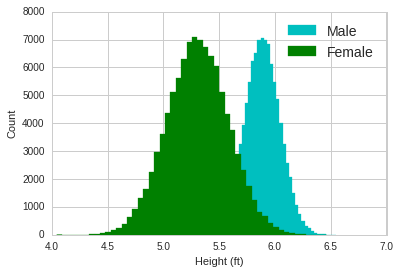

Male distribution has mu = 5.89 and sigma = 0.158
Female distribution has mu = 5.31 and sigma = 0.275


In [3]:
male.plot( n=100000, edgecolor='c', color='c', bins=50, label='Male' )
female.plot( n=100000, edgecolor='g', color='g', bins=50, label='Female' )
plt.legend( fontsize=14 )
plt.ylabel('Count')
plt.xlabel('Height (ft)')
plt.show()

print "Male distribution has mu = {:.3} and sigma = {:.3}".format( *male.parameters )
print "Female distribution has mu = {:.3} and sigma = {:.3}".format( *female.parameters )

Everything seems to look good so let's create our Naive Bayes Classifier.

In [4]:
clf = NaiveBayes([ male, female ])

Let's take a look at how our classifier calls people of various heights. We can either look at a probabilistic measurement of the sample being male or female, or a hard call prediction. Lets take a look at both.

In [5]:
data = np.array([ 5.0, 6.0, 4.92, 5.5 ])

for sample, probability in zip( data, clf.predict_proba(data) ):
    print "Height {:5.3}, {:5.3}% chance male and {:5.3}% chance female".format( sample, 100*probability[0], 100*probability[1])

Height   5.0, 4.39e-05% chance male and 1e+02% chance female
Height   6.0,  97.0% chance male and  2.98% chance female
Height  4.92, 3.22e-06% chance male and 1e+02% chance female
Height   5.5,  9.79% chance male and  90.2% chance female


In [6]:
for sample, result in zip( data, clf.predict( data )):
    print "Person with height {} is {}.".format( sample, "female" if result else "male" )

Person with height 5.0 is female.
Person with height 6.0 is male.
Person with height 4.92 is female.
Person with height 5.5 is female.


These results look good. We can also train a our classifier with a set of data. This is done by creating a set of observations along with a set with the corresponding correct classification.

In [7]:
X = np.array([ 180, 190, 170, 165, 100, 150, 130, 150 ])
y = np.array([ 0, 0, 0, 0, 1, 1, 1, 1 ])

clf.fit( X, y )

In this case we fitted the normal distributions to fit a set of data with male an female weights (lbs). Let's check the results with the following data set.

In [8]:
data = np.array([ 130, 200, 100, 162, 145 ])

Now let's enter it into our classifier.

In [9]:
for sample, result in zip( data, clf.predict( data )):
    print "Person with weight {} is {}.".format( sample, "female" if result else "male" )

Person with weight 130 is female.
Person with weight 200 is male.
Person with weight 100 is female.
Person with weight 162 is male.
Person with weight 145 is female.


Everything looks good from here. In this tutorial we created a simple Naive Bayes Classifier with normal distributions. It is possible to create a classifier with more complex distributions, or even with a Hidden Markov Model.